In [1]:
year=2019
month=9

# Developer Salary in First-Tier Cities 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [2]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
sys.path.append('../../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [3]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in ('北京','上海','广州','深圳')  and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month}  ", con=conn)
conn.close()

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [5]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [6]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,...,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
18004,116717167,10000,200,海外业务软件工程师（2020届）,软件工程师,一般程序员,None,上海,上海,上海海隆软件有限公司成立于1989年4月，是国内著名软件企业、国家规划布局内重点软件企业。公...,...,False,2019-09-02,False,False,True,True,False,False,False,False
11141,114568087,3750,151,C#软件开发,软件工程师,一般程序员,None,北京,北京,北京其然科技有限公司，名字源于，顺 其其自 然然，主旨顺其自然、水到渠成。北京其然科技有限公...,...,False,2019-09-02,False,False,False,False,False,False,False,False
3335,108834444,15000,150,Java开发工程师,软件工程师,一般程序员,None,北京,北京,大连华信计算机技术股份有限公司（简称大连华信）是一家面向全球客户提供领先的应用软件产品、信息...,...,False,2019-09-02,False,False,True,False,False,False,False,False
6036,111488967,8500,90,开发工程师,软件工程师,一般程序员,None,广东,深圳,东华医为科技有限公司（简称东华医为）成立于2012年5月，注册资金5000万，是东华软件股份...,...,False,2019-09-02,False,False,True,False,False,False,False,False
6035,111488966,8500,90,开发工程师,软件工程师,一般程序员,None,广东,广州,东华医为科技有限公司（简称东华医为）成立于2012年5月，注册资金5000万，是东华软件股份...,...,False,2019-09-02,False,False,True,False,False,False,False,False


In [7]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [8]:
data.shape

(22498, 94)

In [9]:
data.headcount.sum()

70039

In [10]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 5000., 10499., 14000., 20000., 37500.])

In [11]:
print(f'{year}年{month}月中国一线城市程序员的平均工资为{salary_mean:.0f}元，工资中位数为{q[2]:.0f}元，其中95%的人的工资位于{q[0]:.0f}到{q[4]:.0f}元之间。')

2019年9月中国一线城市程序员的平均工资为15761元，工资中位数为14000元，其中95%的人的工资位于5000到37500元之间。


In [12]:
print(f'In {year}, Developers in China earn {salary_mean:.0f} Yuan as average, '
      f'the median is {q[2]:.0f} Yuan, 95% of them earn between {q[0]:.0f} and {q[4]:.0f} Yuan.')

In 2019, Developers in China earn 15761 Yuan as average, the median is 14000 Yuan, 95% of them earn between 5000 and 37500 Yuan.


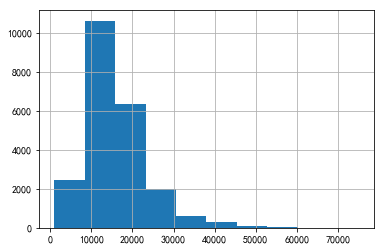

In [13]:
data.monthly_salary.hist()

It does not look like normal distribution.

In [14]:
from scipy import stats

In [15]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=8005.814162220586, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

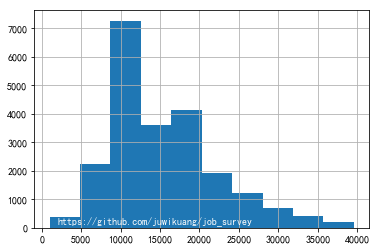

In [16]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [17]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]
    

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
    {"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

In [18]:
data_career = get_sub_stats_by_col(data,'career')
data_career.style.format({"salary_mean":"{:.0f}","salary_median":"{:.0f}","percentage":"{:.2%}"})

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
1,系统架构师,24494,5250,22500,50000,2807,4.01%
2,算法工程师,21538,6000,20000,45608.1,6714,9.59%
0,一般程序员,14719,5000,12500,33740.6,60394,86.23%
3,爬虫工程师,12500,3650,12500,24000,116,0.17%
4,生物信息工程师,11750,8000,11750,14000,8,0.01%


In [19]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

15760.569796827482

In [20]:
data.headcount.sum()

70039

In [21]:
data.headcount.describe()

count    22498.000000
mean         3.113121
std          3.543324
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        200.000000
Name: headcount, dtype: float64

In [22]:
pd.options.display.max_columns=100
data.sort_values(by='headcount', ascending=False).head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,company_size,company_title,company_type,page_title,ageism,db_Apache_Hive,db_CouchBase,db_CouchDB,db_DB2,db_DynamoDB,db_Elasticsearch,db_FileMaker,db_Firebase,db_Firebird,db_Hbase,db_Informix,db_Ingres,db_MariaDB,db_Memcached,db_MongoDB,db_MySQL,db_Neo4j,db_Netezza,db_Oracle,db_PostgreSQL,db_Redis,db_Riak,db_SAP_HANA,db_SQL_Server,db_SQLite,db_Solr,db_Splunk,db_Sybase,db_Teradata,db_dBase,edu,english,experience,expert_adas,expert_blockchain,expert_embed,expert_expert,expert_gis,_996_yes,_996_no,industry,japanese,job_description,job_summary,job_tags,phone_android,phone_app,phone_iso,pl_c_sharp,pl_cpp,pl_delphi,pl_go,pl_haskell,pl_java,pl_javascript,pl_julia,pl_kotlin,pl_lua,pl_matlab,pl_objective_c,pl_perl,pl_php,pl_python,pl_ruby,pl_rust,pl_scrala,pl_swift,pl_typescript,pl_vba,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
18004,116717167,10000,200,海外业务软件工程师（2020届）,软件工程师,一般程序员,None,上海,上海,上海海隆软件有限公司成立于1989年4月，是国内著名软件企业、国家规划布局内重点软件企业。公...,1000-5000,上海海隆软件有限公司,民营公司,【上海-徐汇区海外业务软件工程师（2020届）_海外业务软件工程师（2020届）招聘_上海海...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,no,False,False,False,False,False,False,False,computer,True,针对有志从事软件开发的应届毕业生，在毕业后可选择进入公司培训中心，接受脱产带薪培训，培训内容...,上海-徐汇区|无工作经验|本科|招200人|09-02发布,"五险一金,专业培训,员工旅游,年终奖金,弹性工作,定期体检,出国机会,绩效奖金,工作午餐,加薪晋升",False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2019-09-02,False,False,True,True,False,False,False,False
11141,114568087,3750,151,C#软件开发,软件工程师,一般程序员,None,北京,北京,北京其然科技有限公司，名字源于，顺 其其自 然然，主旨顺其自然、水到渠成。北京其然科技有限公...,50-150,北京其然科技有限公司,民营公司,【北京-海淀区C#软件开发_C#软件开发招聘_北京其然科技有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,no,False,False,False,False,False,False,False,computer,False,熟悉面向对象思想熟悉.Net架构体系精通C#开发语言熟悉WinFrom开发熟悉Asp.Net...,北京-海淀区|无工作经验|大专|招151人|09-02发布,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-09-02,False,False,False,False,False,False,False,False
3335,108834444,15000,150,Java开发工程师,软件工程师,一般程序员,None,北京,北京,大连华信计算机技术股份有限公司（简称大连华信）是一家面向全球客户提供领先的应用软件产品、信息...,5000-10000,大连华信计算机技术股份有限公司,合资,【北京-朝阳区Java开发工程师_Java开发工程师招聘_大连华信计算机技术股份有限公司】-...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,5_10,False,False,False,False,False,False,False,computer,False,1、5年以上java开发工作经验。2、有丰富研发经验；深入理解SpringCloud、spr...,北京-朝阳区|5-7年经验|本科|招150人|09-02发布,"五险一金,补充医疗保险,定期体检,年终奖金",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2019-09-02,False,False,True,False,False,False,False,False
6035,111488966,8500,90,开发工程师,软件工程师,一般程序员,None,广东,广州,东华医为科技有限公司（简称东华医为）成立于2012年5月，注册资金5000万，是东华软件股份...,1000-5000,东华医为科技有限公司,民营公司,【广州开发工程师_开发工程师招聘_东华医为科技有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,本科,False,no,False,False,False,False,False,False,False,medical,False,工作职责：1、软件的程序设计与代码编写。 2、有关技术方案、文档的编写，软件单元的测试。 3...,广州|无工作经验|本科|招90人|09-02发布,"五险一金,通讯补贴,年终奖金,定期体检",False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2019-09-02,False,False,True,False,F

In [23]:
data.headcount.sum()

70039

# 城市

In [24]:
headcount_by_cities = data.groupby(by='city').headcount.sum()

In [25]:
headcount_by_cities


city
上海    23762
北京    10880
广州    16002
深圳    19395
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x1f15a53dda0>,
 [Text(0.5321439955042652, 0.9627163486971418, '上海'),
  Text(-0.9535681200425816, 0.5483683437603386, '北京'),
  Text(-0.8526240713220423, -0.6950051748024795, '广州'),
  Text(0.7093421420548432, -0.840734039696887, '深圳')],
 [Text(0.2902603611841446, 0.5251180083802591, '33.9%'),
  Text(-0.5201280654777717, 0.2991100056874574, '15.5%'),
  Text(-0.4650676752665685, -0.3790937317104433, '22.8%'),
  Text(0.3869138956662781, -0.4585822034710292, '27.7%')])

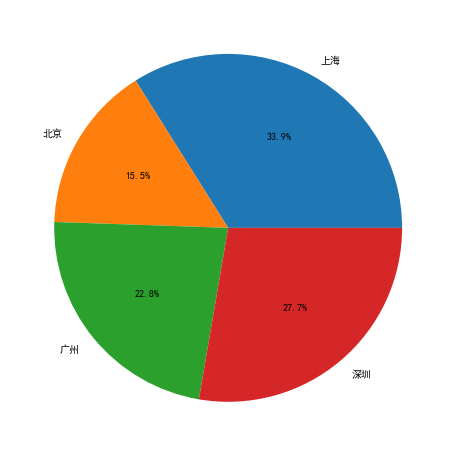

In [26]:
plt.figure(figsize=(10,8))
plt.pie(headcount_by_cities.values, labels=headcount_by_cities.index, autopct='%1.1f%%')

In [27]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,16979,3750,15000,42500,10880,15.53%
上海,16439,5500,15000,37500,23762,33.93%
深圳,16094,5250,14333,37500,19395,27.69%
广州,13519,3750,12500,30000,16002,22.85%


In [28]:
salary_beijing=data[data.city=='北京'].monthly_salary
salary_shanghai=data[data.city=='上海'].monthly_salary
salary_guangzhou=data[data.city=='广州'].monthly_salary
salary_shenzhen=data[data.city=='深圳'].monthly_salary

In [29]:
stats.f_oneway(salary_beijing, salary_shanghai)

F_onewayResult(statistic=19.220702046601424, pvalue=1.1758946188313447e-05)

In [30]:
stats.f_oneway(salary_shanghai, salary_shenzhen)

F_onewayResult(statistic=64.48071221734195, pvalue=1.0517229190547286e-15)

In [31]:
stats.f_oneway(salary_shenzhen, salary_guangzhou)

F_onewayResult(statistic=324.8842651551726, pvalue=1.0776918289295962e-71)

# 编程语言

In [32]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)

rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,rust,26423,29444,8275,60000,113,0.11%
2,lua,19917,20000,6158,40000,1076,1.08%
3,python,19885,17500,5000,45000,8997,9.03%
4,go,19860,17500,7000,45000,8786,8.82%
5,matlab,19695,17500,5604,45000,1542,1.55%
6,kotlin,18161,15000,8000,60000,374,0.38%
7,perl,18066,15000,5000,45833,733,0.74%
8,cpp,17909,15000,5250,40000,16658,16.72%
9,ruby,17659,17500,2932,34680,283,0.28%
10,swift,17186,15917,7000,30000,974,0.98%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [33]:
edu_counts=data[~(data.edu=='')].groupby(by=['edu']).headcount.sum()

In [34]:
edu_counts

edu
初中及以下        7
博士         115
大专       19161
本科       37899
硕士        1932
高中         260
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x1f15d486630>,
 [Text(1.0999999245488463, 0.0004074218117246266, '初中及以下'),
  Text(1.099974375963616, 0.007508143808815682, '博士'),
  Text(0.5693570237392687, 0.9411867931068529, '大专'),
  Text(-0.6800441670136861, -0.8646039156230221, '本科'),
  Text(1.0907551296863862, -0.14231390326610857, '硕士'),
  Text(1.0998959112663538, -0.015132229827664441, '高中')],
 [Text(0.5999999588448252, 0.00022223007912252355, '0.0%'),
  Text(0.5999860232528814, 0.0040953511684449165, '0.2%'),
  Text(0.31055837658505564, 0.5133746144219197, '32.3%'),
  Text(-0.3709331820074651, -0.4716021357943756, '63.8%'),
  Text(0.5949573434653015, -0.07762576541787738, '3.3%'),
  Text(0.599943224327102, -0.008253943542362422, '0.4%')])

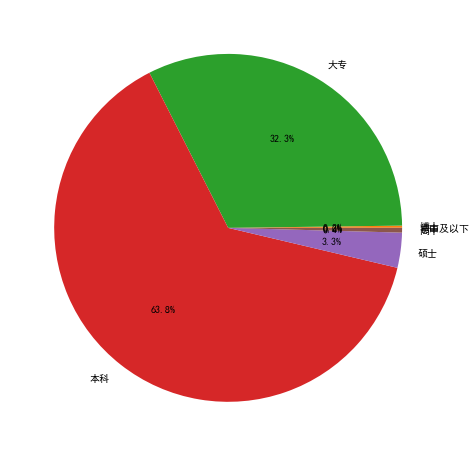

In [35]:
plt.figure(figsize=(10,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')

In [36]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['初中及以下','高中','大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,26419,12500,22500,50781,115,0.19%
硕士,21788,3750,20833,45000,1932,3.25%
本科,17065,5250,15000,40000,37899,63.83%
初中及以下,16214,6000,12500,30000,7,0.01%
大专,13178,3750,12500,29166,19161,32.27%
高中,8066,3750,6500,38571,260,0.44%


In [37]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [38]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是13406，17333，22260，30322。中位数分别是12500， 15000，20833， 27500。


In [39]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=23.171951509082557, pvalue=1.7947259360804315e-06)

In [40]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=223.80800888040434, pvalue=3.398449607416261e-50)

In [41]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=1056.9213896994295, pvalue=1.512465375687874e-225)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

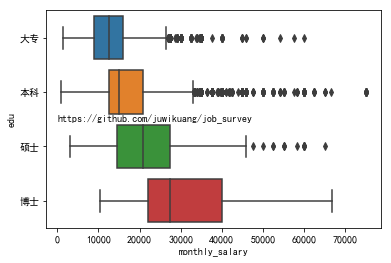

In [42]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [43]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,29107,9000,27500,50000,204,0.29%
5_10,22342,11500,20000,45000,8782,12.54%
3_5,17452,9000,15000,37500,20678,29.52%
no,13645,3750,12500,35000,21192,30.26%
1_3,13118,5250,12500,30000,19183,27.39%


In [44]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

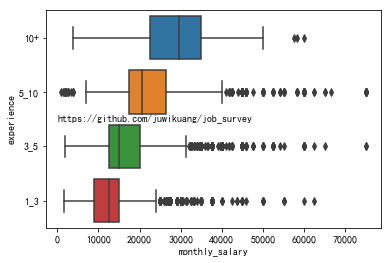

In [45]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [46]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

company_type,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
外资（欧美）,19342,7000,17500,45000,3486,4.98%
民营公司,15652,5000,13500,37500,52748,75.31%
外资（非欧美）,15561,5250,14000,32500,3790,5.41%
合资,15370,5500,13500,32500,6665,9.52%
国企,14857,4042,14000,30000,3114,4.45%
事业单位,13913,5250,12500,25000,185,0.26%
外企代表处,11393,9000,9000,21000,14,0.02%
非营利组织,11270,5250,12250,16437,37,0.05%


us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [47]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

company_size,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10000+,23951,4500,24000,52500,3764,5.37%
1000-5000,16764,5655,15000,40000,8322,11.88%
5000-10000,16687,7000,15000,34970,1464,2.09%
500-1000,16652,5250,15000,35000,7309,10.44%
150-500,15700,5250,14000,35000,18040,25.76%
50-150,14693,4250,12500,31250,21682,30.96%
50-,13730,4500,12500,30000,8402,12.00%
,10317,7000,7000,30000,1056,1.51%


公司越大，工资越高

## 行业 Industry

In [48]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)

industry,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
finance,17267,5210,16231,37500,2233,3.19%
ads,16174,5250,12500,42500,821,1.17%
computer,15926,4750,14000,37500,52656,75.18%
service,15904,6500,15000,30000,623,0.89%
trade,15441,5462,14500,32500,4164,5.95%
energy,14948,4425,15000,30000,683,0.98%
edu,14820,6000,12500,35000,4732,6.76%
logistic,14669,7000,12500,30000,808,1.15%
realestate,14625,4440,12500,28544,996,1.42%
gov,14586,5068,14000,29166,803,1.15%
